In [17]:
# libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [18]:
walkscore = pd.read_csv('../Wildfire-Transit-Access/Walk_Transit_Bike Score - Sheet1.csv')

walkscore = walkscore[~(walkscore == '--').any(axis=1)]
walkscore.head()

,City,State,Walk Score,Transit Score,Bike Score,Population
0,New York,NY,88.0,88.6,69.3,"8,175,133"
1,Los Angeles,CA,68.6,52.9,58.7,"3,792,621"
2,Chicago,IL,77.2,65,72.2,"2,695,598"
3,Houston,TX,47.5,36.2,48.6,"2,099,451"
4,Philadelphia,PA,74.8,67,66.7,"1,526,006"


In [20]:
to_cluster = walkscore[['Walk Score',
                       'Transit Score',
                       'Bike Score']]

scaler = preprocessing.StandardScaler().fit(to_cluster)
                   
df_to_cluster = pd.DataFrame(scaler.transform(to_cluster), 
                         columns=to_cluster.columns, index=walkscore.index)
kmeans = KMeans(n_clusters=5, random_state=1).fit(df_to_cluster)
print(kmeans)
df_to_cluster['cluster_id'] = kmeans.labels_
print(df_to_cluster.groupby('cluster_id').size())


KMeans(n_clusters=5, random_state=1)
cluster_id
0    36
1    14
2    36
3     8
4     7
dtype: int64


In [21]:
df_to_cluster.head()

,Walk Score,Transit Score,Bike Score,cluster_id
0,2.467324,3.397932,1.437278,4
1,1.250246,1.092556,0.529568,1
2,1.789776,1.873930,1.685613,4
3,-0.073482,0.014130,-0.335325,2
4,1.639209,2.003082,1.214632,4


In [28]:
#cluster_join = walkscore.join(df_to_cluster,)
cluster_join = pd.merge(walkscore, df_to_cluster['cluster_id'], left_index=True, right_index=True)

In [29]:
cluster_join.head()

,City,State,Walk Score,Transit Score,Bike Score,Population,cluster_id
0,New York,NY,88.0,88.6,69.3,"8,175,133",4
1,Los Angeles,CA,68.6,52.9,58.7,"3,792,621",1
2,Chicago,IL,77.2,65,72.2,"2,695,598",4
3,Houston,TX,47.5,36.2,48.6,"2,099,451",2
4,Philadelphia,PA,74.8,67,66.7,"1,526,006",4


In [32]:
cluster_join[cluster_join['cluster_id'] == 0]

,City,State,Walk Score,Transit Score,Bike Score,Population,cluster_id
6,San Antonio,TX,36.9,30.9,44.5,"1,327,407",0
10,Jacksonville,FL,25.6,20.8,40.5,"821,784",0
11,Indianapolis,IN,31.0,24.9,42.8,"820,445",0
15,Fort Worth,TX,34.9,21.6,38.6,"741,206",0
16,Charlotte,NC,26.4,27.4,31.3,"731,424",0
18,El Paso,TX,40.4,28,42.0,"649,121",0
19,Memphis,TN,35.0,22.2,41.2,"646,889",0
24,Nashville-Davidson,TN,28.8,21.7,29.7,"601,222",0
26,Louisville-Jefferson,KY,34.3,27.3,43.3,"597,337",0
30,Oklahoma City,OK,34.1,16.9,40.2,"579,999",0


In [33]:
cluster_join[cluster_join['cluster_id'] == 1]

,City,State,Walk Score,Transit Score,Bike Score,Population,cluster_id
1,Los Angeles,CA,68.6,52.9,58.7,"3,792,621",1
20,Baltimore,MD,64.3,53.2,53.4,"620,961",1
27,Milwaukee,WI,61.5,48.7,57.6,"594,833",1
44,Cleveland,OH,57.1,43.9,52.3,"396,815",1
51,New Orleans,LA,58.0,43.9,65.7,"343,829",1
52,Honolulu,HI,65.7,56.3,51.0,"337,256",1
56,Santa Ana,CA,67.1,43.3,62.2,"324,528",1
57,St. Louis,MO,65.7,42.6,57.7,"319,294",1
58,Pittsburgh,PA,62.4,55.2,54.9,"305,704",1
66,St. Paul,MN,60.4,46.4,64.0,"285,068",1


In [34]:
cluster_join[cluster_join['cluster_id'] == 2]

,City,State,Walk Score,Transit Score,Bike Score,Population,cluster_id
3,Houston,TX,47.5,36.2,48.6,"2,099,451",2
5,Phoenix,AZ,41.4,35.6,55.9,"1,445,632",2
7,San Diego,CA,53.3,37.3,43.0,"1,307,402",2
8,Dallas,TX,46.0,38.9,49.3,"1,197,816",2
9,San Jose,CA,50.5,40.1,61.5,"945,942",2
13,Austin,TX,41.7,34.8,54.0,"790,390",2
14,Columbus,OH,41.2,30.2,47.7,"787,033",2
17,Detroit,MI,51.1,35.7,52.1,"713,777",2
29,Las Vegas,NV,42.0,35.5,46.5,"583,756",2
31,Albuquerque,NM,42.6,28.6,60.9,"545,852",2


In [35]:
cluster_join[cluster_join['cluster_id'] == 3]

,City,State,Walk Score,Transit Score,Bike Score,Population,cluster_id
22,Seattle,WA,74.4,59.6,71.1,"608,660",3
25,Denver,CO,61.2,44.6,71.8,"600,158",3
28,Portland,OR,67.3,49.3,82.7,"583,776",3
35,Long Beach,CA,73.3,48.9,70.1,"462,257",3
43,Miami,FL,76.6,57,64.0,"399,457",3
46,Oakland,CA,75.3,56.6,65.5,"390,724",3
47,Minneapolis,MN,71.4,55,83.5,"382,578",3
102,Arlington,VA,71.2,58.6,72.3,"207,627",3


In [36]:
cluster_join[cluster_join['cluster_id'] == 4]

,City,State,Walk Score,Transit Score,Bike Score,Population,cluster_id
0,New York,NY,88.0,88.6,69.3,"8,175,133",4
2,Chicago,IL,77.2,65,72.2,"2,695,598",4
4,Philadelphia,PA,74.8,67,66.7,"1,526,006",4
12,San Francisco,CA,88.7,77.1,72.3,"805,235",4
21,Boston,MA,82.8,72.4,69.4,"617,594",4
23,Washington D.C.,DC,76.7,68.7,69.5,"601,723",4
74,Jersey City,NJ,86.6,70.5,63.9,"247,597",4


In [37]:
# code from https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

def radar_plot(kmeans, df_scaled):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in df_scaled.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')

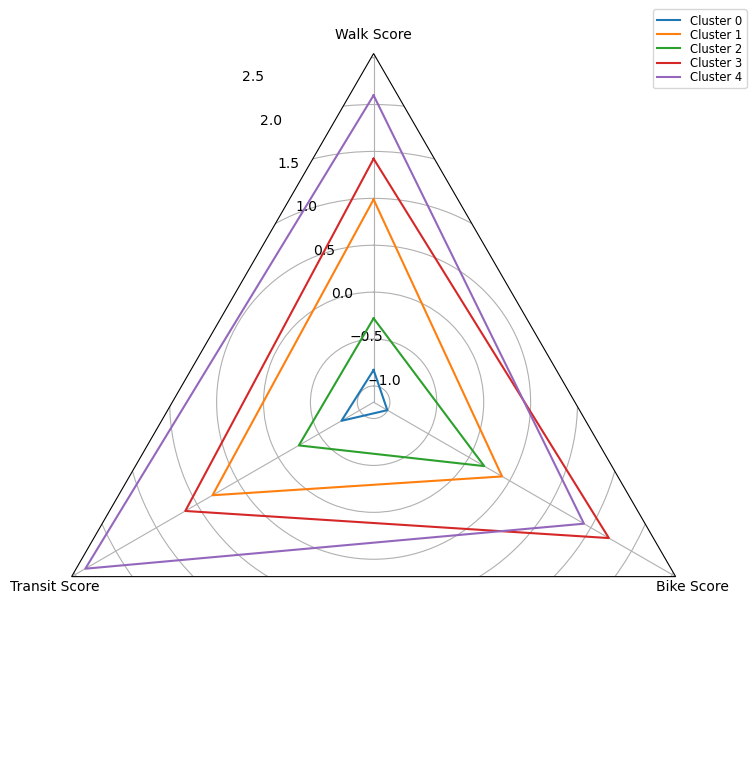

In [38]:
# radar plot (only run this at the end)
df_to_cluster.drop(columns=['cluster_id'], inplace=True) 
radar_plot(kmeans, df_to_cluster)